In [1]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold

In [2]:
# data sample
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

In [3]:
# prepare cross validation
kfold = KFold(3, True, 1)

In [4]:
# enumerate splits
for train, test in kfold.split(data):
	print('train: %s, test: %s' % (data[train], data[test]))

train: [0.1 0.4 0.5 0.6], test: [0.2 0.3]
train: [0.2 0.3 0.4 0.6], test: [0.1 0.5]
train: [0.1 0.2 0.3 0.5], test: [0.4 0.6]


In [5]:
#https://medium.datadriveninvestor.com/k-fold-cross-validation-6b8518070833
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np

dataset = pandas.read_csv('housing1.csv')

print(dataset.shape)


(505, 14)


In [6]:
X = dataset.iloc[:, [0, 12]]
y = dataset.iloc[:, 13]

In [7]:
X.head()

,0.00632,4.98
0,0.02731,9.14
1,0.02729,4.03
2,0.03237,2.94
3,0.06905,5.33
4,0.02985,5.21


In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [9]:
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

Train Index:  [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 

In [16]:
scores

[0.5716052257894499,
 0.32183831749311664,
 0.32672291207933146,
 -0.43342783921718286,
 -0.08210230926280082,
 -0.6887431905577974,
 0.13894317036719395,
 0.4424262980362451,
 -0.15931620182054118,
 0.4416202671824536]

In [10]:
print(np.mean(scores))
print(np.std(scores))

0.08795666500894685
0.39548964066183956


In [17]:
#grid search
#https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/


import pandas as pd
import numpy as np

dataset = pd.read_csv("wineQualityReds.csv", sep=',')

dataset.head()



X = dataset.iloc[:, 0:11].values
y = dataset.iloc[:, 11].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=0)


from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)





from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
print(all_accuracies)


grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

from sklearn.model_selection import GridSearchCV

gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)


best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_
print(best_result)

[0.709375   0.678125   0.69811321 0.67405063 0.6952381 ]
{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 300}
0.7010698552548773


[1.         0.99137658 0.99360006 0.99206986 0.99081899 0.98970371
 0.9901229  0.98859211 0.9880354 ]


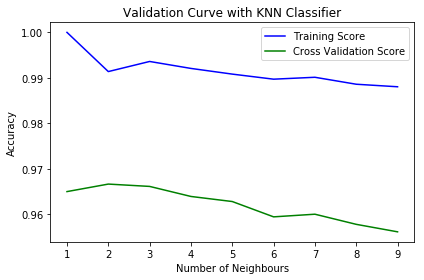

In [15]:
# Import Required libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
  
# Loading dataset
dataset = load_digits()
  
# X contains the data and y contains the labels
X, y = dataset.data, dataset.target
  
# Setting the range for the paramter (from 1 to 10)
parameter_range = np.arange(1, 10, 1)
  
# Calculate accuracy on training and test set using the 
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(KNeighborsClassifier(), X, y,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")
  
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
print(mean_train_score)
std_train_score = np.std(train_score, axis = 1)
  
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
  
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score, 
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
  
# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

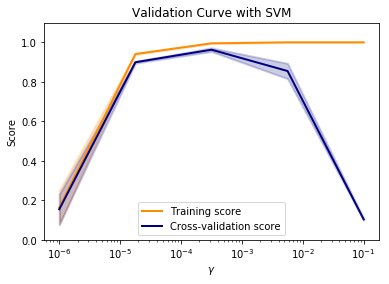

In [13]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

X, y = load_digits(return_X_y=True)

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()